In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

# 輸入特徵
X = iris.data

# 輸出特徵
y = iris.target

For Iris Dataset returns include:

1. data: the data matrix. 取得輸入特徵
2. target: the classification target. 取得輸出特徵
3. feature_name: the names of the dataset columns. 取得輸入特徵的名稱
4. target_name: the names of target classes. 取得輸出特徵的名稱
5. DESCR: the full description of the data.

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# 將dataset轉成Dataframe的格式進行資料探索
df = pd.DataFrame(
    # np.c_ -> 將2個matrix左右相加(rows要相等)
    data=np.c_[iris["data"], iris["target"]],
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"],
)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


由`df`可以得知:

- 資料總筆數:150
- 欄數: 4個輸入特徵 + 1個輸出

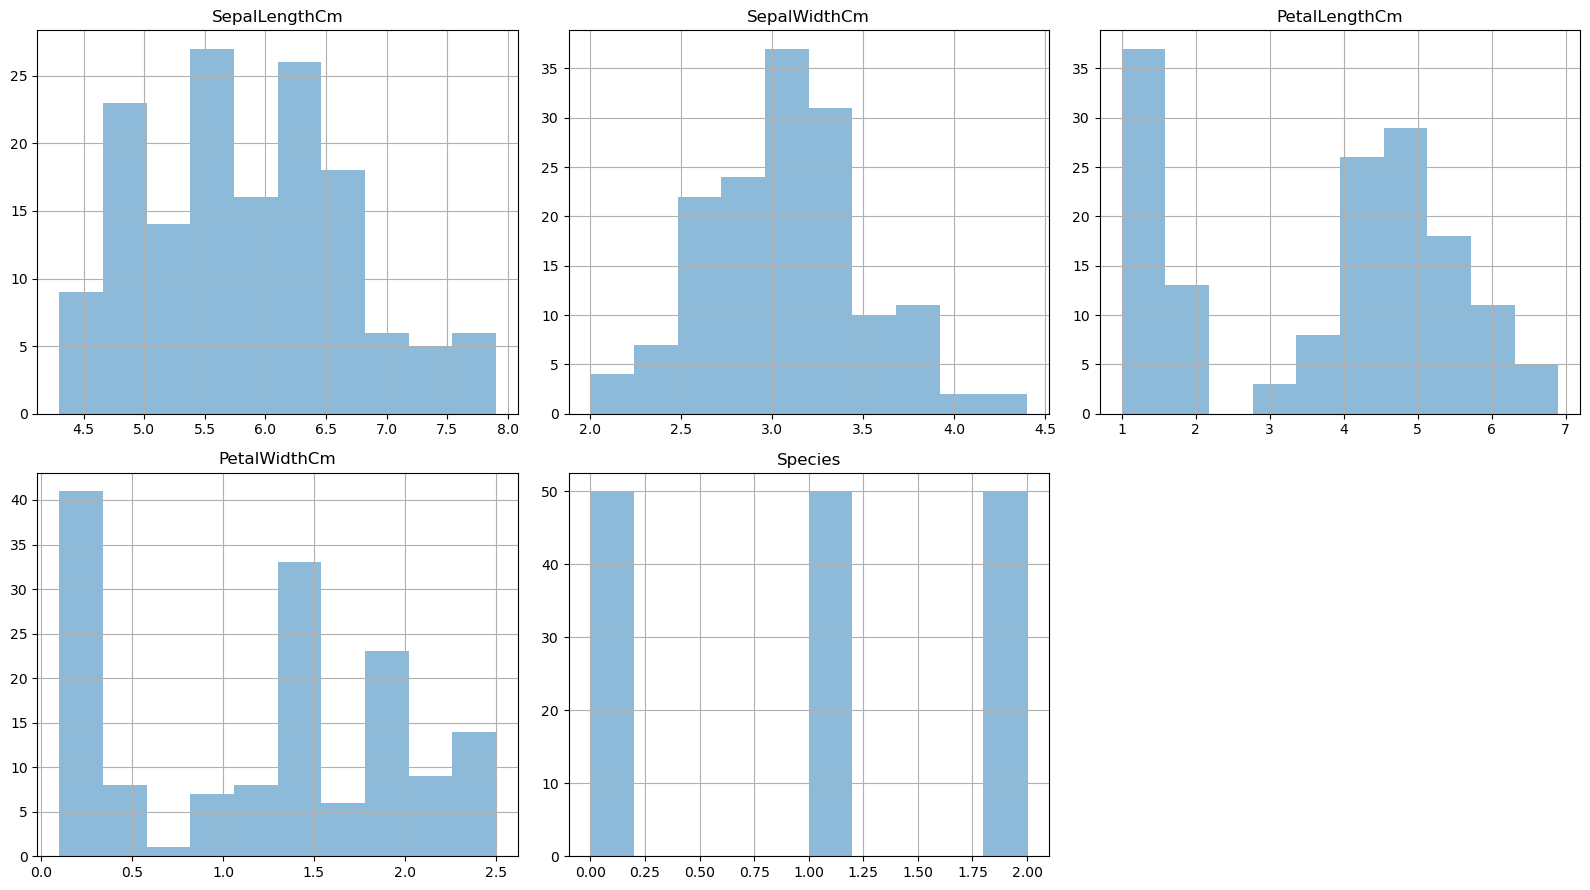

In [6]:
# 直方圖 histograms
df.hist(alpha=0.5,  # 設定透明度(填滿顏色)
        layout=(2, 3),  # 圖的布局(rows, columns)
        figsize=(16, 9),  # 要創建圖的大小
        bins=10)  # bins就是每一個長方形的width(子間隔)
plt.tight_layout()  # 調整subplots之間的距離
plt.show()

使用`seaborn`的`histplot`做出完整的直方分析圖

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

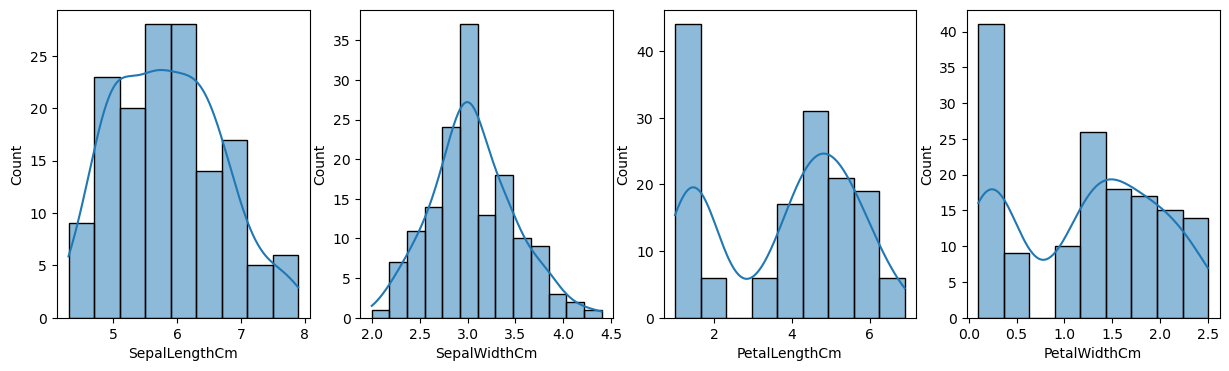

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(15, 4)
sns.histplot(df["SepalLengthCm"][:], ax=axes[0], kde=True)
sns.histplot(df["SepalWidthCm"][:], ax=axes[1], kde=True)
sns.histplot(df["PetalLengthCm"][:], ax=axes[2], kde=True)
sns.histplot(df["PetalWidthCm"][:], ax=axes[3], kde=True)

## 核密度估計

> KDE, Kernel Density Estimation

分為有對角線與非對角線兩部分，在對角線部分是以核密度估計圖的方式呈現，用來看某一特徵的分布情形。

- X bar: 對應該特徵的數值
- Y bar: 對應該特徵的密度(出現頻率)

array([[<Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='Species', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='Species', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='Species', ylabel='PetalLengthCm'>],
       [<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
   

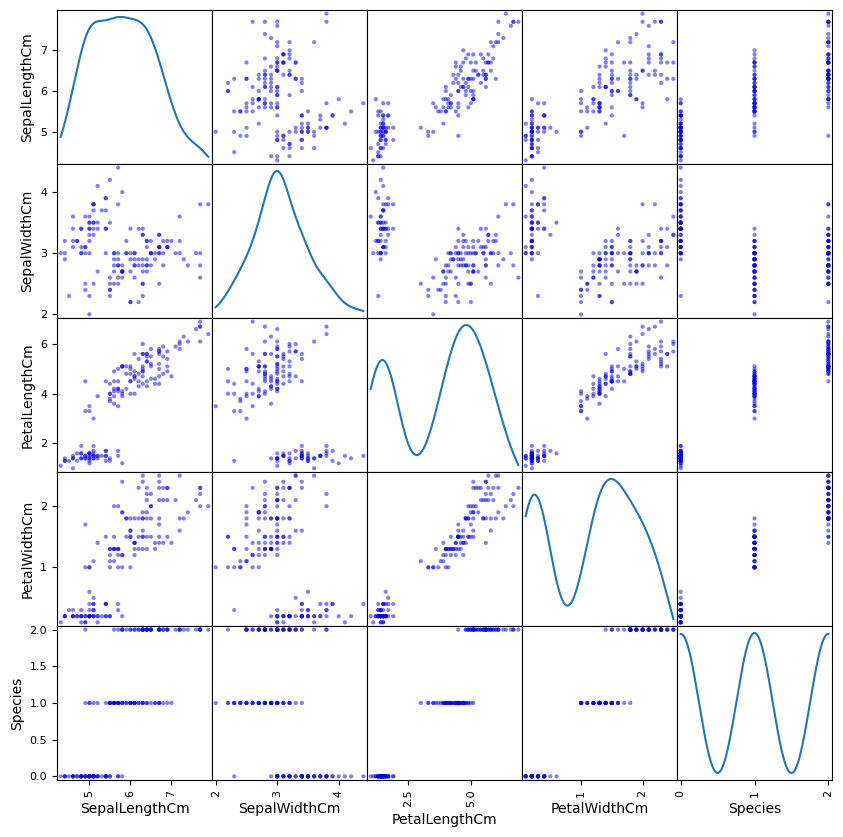

In [8]:
pd.plotting.scatter_matrix(df,
                           figsize=(10, 10),
                           color='b',
                           diagonal='kde')

使用`seaborn`繪製KDE

[KDE參考文章]("https://datama.com.tw/20191112b1/")

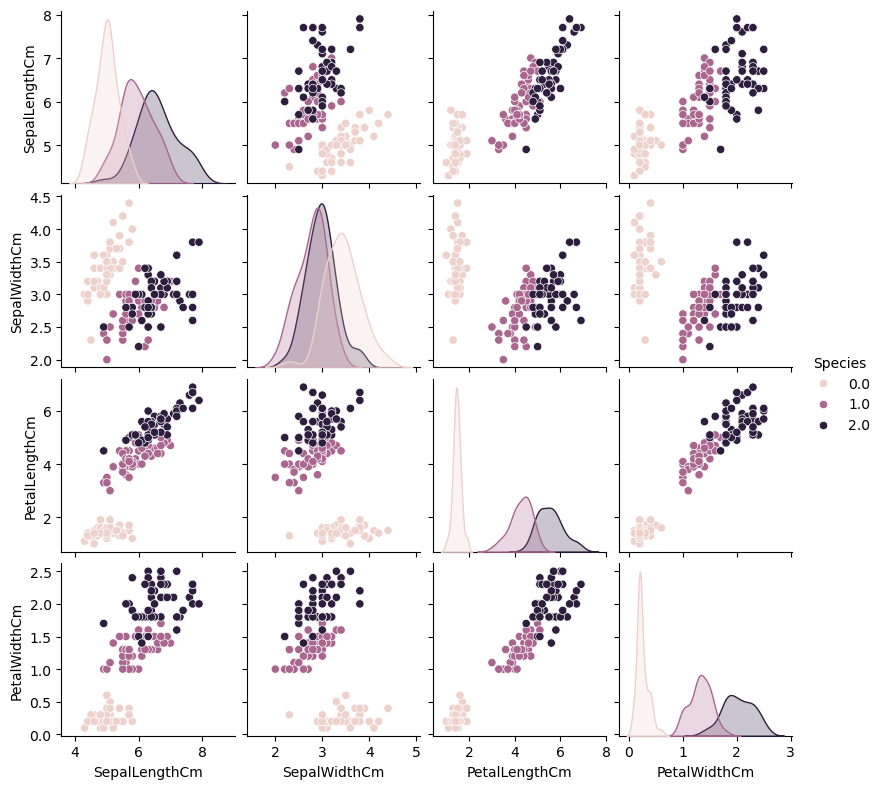

In [9]:
sns.pairplot(df,
             hue="Species",
             height=2,
             diag_kind="kde")

**關聯分析(Correlation)**

<Axes: >

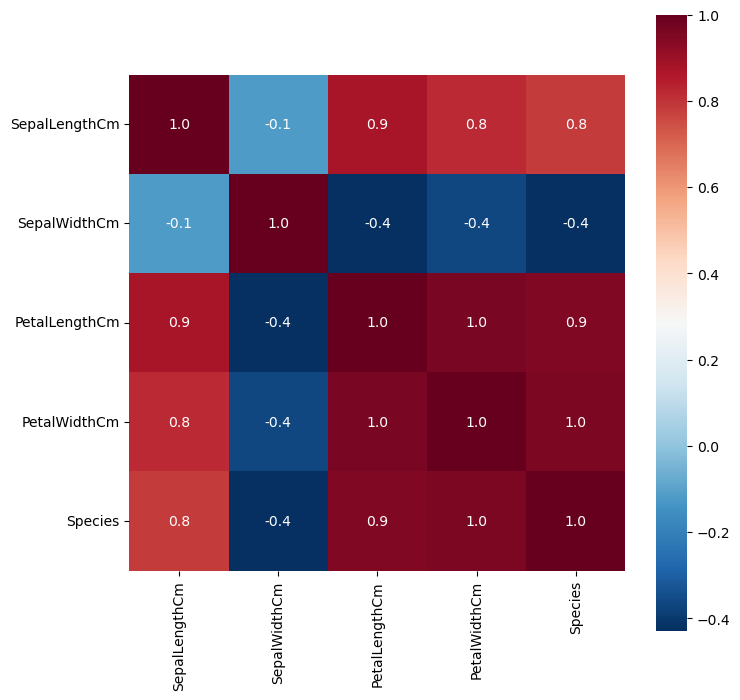

In [10]:
corr = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]].corr()
plt.figure(figsize=(8, 8))
# matplotlib colormaps https://matplotlib.org/stable/users/explain/colors/colormaps.html
sns.heatmap(corr, square=True, annot=True, fmt=".1f", cmap="RdBu_r")

**散布圖**

透過散布圖可從二維(Two Dimensional)平面上觀察兩兩特徵間彼此的分布情況，如果該特徵重要程度越高，群聚效果會更加顯著。

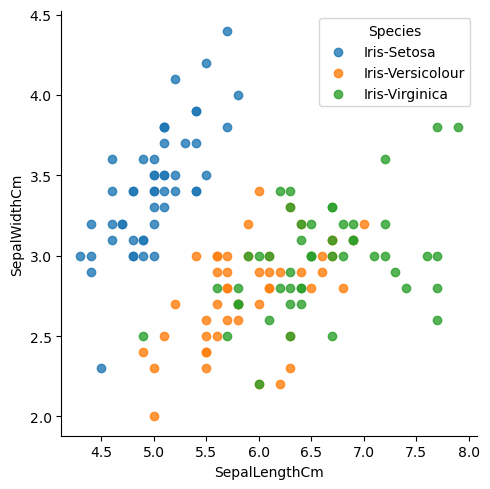

In [11]:
sns.lmplot(
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species",
    data=df,
    fit_reg=False,
    legend=False
)

# Place a legend on the Axes. (放置圖例))
plt.legend(
    title="Species",  # 圖利標題
    loc="upper right",  # 圖例的位置
    labels=["Iris-Setosa", "Iris-Versicolour", "Iris-Virginica"]  # 圖例標籤名稱
)

**箱型圖 Box Plot**

透過箱型圖可以分析每個特徵的分布情形，以及是否有離群值(Outlier)

Text(0.5, 1.0, 'Species')

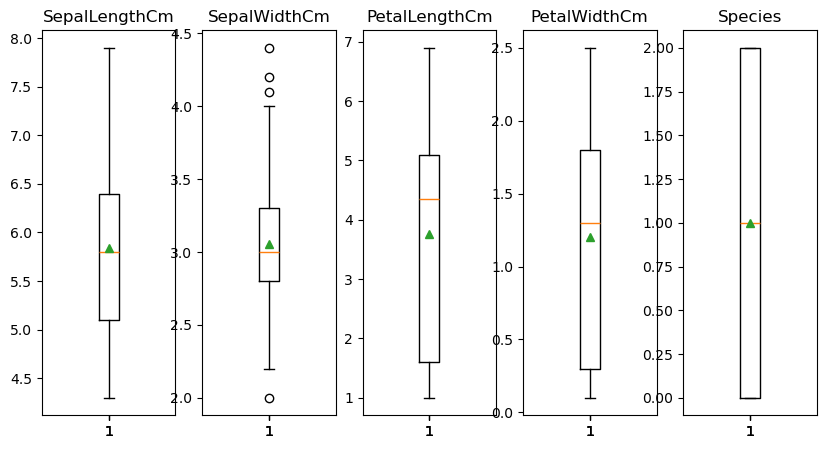

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 5), sharex=True)

axes[0].boxplot(df["SepalLengthCm"], showmeans=True)
axes[0].set_title("SepalLengthCm")


axes[1].boxplot(df["SepalWidthCm"], showmeans=True)
axes[1].set_title("SepalWidthCm")

axes[2].boxplot(df["PetalLengthCm"], showmeans=True)
axes[2].set_title("PetalLengthCm")

axes[3].boxplot(df["PetalWidthCm"], showmeans=True)
axes[3].set_title("PetalWidthCm")

axes[4].boxplot(df["Species"], showmeans=True)
axes[4].set_title("Species")